# Workbook 11: Depth and Breadth-First Search
## Aims of this practical workbook
1. To give you hands-on experience of configuring depth-first search to try and make it work for the fox-chicken-grain problem
2. To give you hands-on experience of taking code that implements one search method (depth-first) and adapting it to use another (breadth-first)

## Reminder of PseudoCode for Depth-First Search


Variables workingCandidate, openList, closedList

Initialisation: Make initial guess,  test it, then start the openList*    
```
SET workingCandidate = StartSolution
Evaluate (workingCandidate)
IF( IsAtGoal(workingCandidate)) ##lucky guess!
    OUTPUT (SUCCESS, workingCandidate)
APPEND workingCandidate to openList
````

Main loop

    WHILE ( Openlist not empty) DO       ##main search loop ##
        MOVE (last item from openList into working candidate)
        FOREACH (1-step neighbour)
            neighbour = ApplyMoveOperator(workingCandidate) ## Generate
            Evaluate(neighbor)                              ## Test
	        IF(IsAtGoal(neighbour))
                OUTPUT (SUCCESS, neighbour)
            ELSE IF (neighbor is feasible)                  ## Update Memory
                APPEND( neighbor to end of openList)
            ELSE
                APPEND( neighbor to end of closedList) 
        COPY (working candidate to closedList)
 
    OUTPUT (FAILURE, workingCandidate)     ## if no more solutions to test
 

### Example: The fox-chicken-grain problem 
- You have a fox, a chicken and a sack of grain.  
- You must cross a river with only one of them at a time.
- If you leave the fox with the chicken he will eat it;
- If you leave the chicken with the grain he will eat it.

Can you get all three across safely in less than ten moves?



## What does generate-and-test look like for fox-chicken-grain problem?<img src = "figures/fox-chicken-grain-partial-graph.png" style = "float:right" width=25%>

A solution is a sequence of moves of boat with different passengers
```
class candidateSolution:
    def __init__(self):
        self.variableValues = []
        self.quality = 0
        self.depth=0
```

There are 8 moves in total {nothing,fox,chicken,grain} X {bank1to2, bank2to1}
- number these from 0 to 7
- candidateSolution.variableValues is a list of moves

**Evaluate()**: 
score is -1 (infeasible), 0 (ok but doesn't reach goal) or 1 (reaches goal)
- starts from state(0,0,0,0)
- apply move referenced in variableValues[0] to get next state
  - if move can't be applied do nothing and leave state unchanged
  - else if next state in forbidden list return INFEASIBLE (-1)
  - else if next state = (1,1,1,1) return SUCCESS (1)
  - else get and apply next move

Choices for ApplyMoveOperator() on Foreach(1-step neighbour) loop;
- perturbative (use *fixed number of d* moves):  
  nested loop through each position (1...n) and value (0...7) changing  a specific move to the new value
  - i.e. each solution has *d* moves and 7d neighbours (7 different values in d different position)  
  
- constructive:  loop through each possible extra move adding that to the *d* existing ones at depth *d*  
  - i.e.  each solution with *d* moves has  8 neighbours, all with *d+1* moves

<div class = "alert alert-warning" style="color:black">
    <h2> Activity 1: Testing an implementation of depth-first search.</h2>
    <ol>
        <li>Read the code implementation below, then run the two cells below this and  answer the question about what type of search the method is doing</li>
        <li>Make a prediction about whether the code will complete (finish) or not. Be honest and write this down (with a reason) <b>before</b> you run the algorithm</li>
        <li> Then run the code and see if your prediction was correct</li>  
        <li> Then answer the two multiple choice questions after the depth-first code cell. <br>
            You may need to alter the value of the variable maxIterations to satisfy yourself about the answers.</li>
    </ol>
</div>

<h2> ive written a new multiple choice question you might want to check but again ust use the multiple choice nanswers </h2>

In [1]:
#run this cell to import libraries and utilities
import workbook11_utils as wb11
import copy


In [2]:
#run this cell to display the first question
display(wb11.Q0)

In [3]:
#run this cell to display the second question
display(wb11.Q6)

# LUCA 0: 
- throughout workbooks and lectures, and as you are creating new code,  change the naming convention for functions/methods/attributes to use lower case and underscores between words rather than camelCase

- throughout the search topic please highlight use of [in]feasible so I can change to talking about breaking constraints


# LUCA 2: please create new function: start_search_with_empty_solution()
 - from the code below
 - would be nice to have a shorter name (maybe wb12 uses initialize()
 - **TO DISCUSS should there be a class SingleMemberSearch() ???**

# LUCA 3: refactoring supporting code into different files
1. please create a new file fox_grain_chicken.py and move TranslateSolutionAsString, Evaluate, IsAtGoal, move_names to there
  1.1 rename TranslateSolutionAsString to to_display() 

2. please move the class description for CandidateSolution into a new file called candidateSolution.py
 - add Boolean attribute breaks_constraints (default False)
 - add string attribute reason (default "")
 - and maybe add setters and getters for attributes
  
# LUCA 4: wrap the main seach loop up in a function called do_search()
1. change ```nextItem = len(openList) -1 #MOVE (last item from openList into working candidate)```  
  to ```next_item = get_next_item_for_algorithm()```
2. change ```elif neighbour.quality==0:```  
  to ```elif meets_constraints(neighbour)```
  
3. add a function meets_constraints(attempt:CandidateSolution)
  - for fox-grain-chicken (and most others) this just checks the value of breaks_constraints 
  - but for the restricted search we should change the activity to saying: 
  " Create a new sub-class of SingleMemberSearch where you 
    add an attribute MAX_DEPTH   
    and then edit meets_constraints() to check the len of attempt.variable_values"


# LUCA 5: create a new file N_Queens.py with functions evaluate(), is_at_goal, to_display()
- then create a new activity where students take the search algorothm and apply it to new problem

In [76]:
## Common Initialisation
import copy

from candidateSolution import CandidateSolution
#Variables workingCandidate, openList, closedList 

class SearchForProblem:
    def __init__(self,evaluate=None,at_goal=None,to_display=None):
        
        self.evaluate = evaluate
        self.to_display = to_display
        self.at_goal = at_goal
        self.algorithm="unknown"

    """ docstrigns need adding"""
    def init(self,maxIterations:int):
        self.max_iterations = maxIterations
        workingCandidate = CandidateSolution()
        self.openList = []
        self.closedList = []
        ## make initial guess,  test it, then start the openList ##
        ## in this case we start with no moves, depth 0, 
        ## this does nothing so is not at goal but is feasible
        workingCandidate.quality=0
        self.atGoal = False
        self.openList.append(workingCandidate)


        ##problem specific parts here###
        # there are 8 possible next moves: fox/chicken/grain/nothing in boat X  2 directionss
        self.possibleMoves = (0,1,2,3,4,5,6,7)
        #Evaluate method was imported above
        #IsatGoal was imported above

    def run_search(self):    ##search parameters
        iteration=1
        while( self.atGoal==False and  len(self.openList)>0 and iteration<self.max_iterations): #WHILE ( Openlist not empty) DO
            print(f"Iteration {iteration} there are {len(self.openList)} candidates on the openList")
            iteration = iteration + 1
            nextItem = 0#len(self.openList) -1 #MOVE (last item from openList into working candidate)
            workingCandidate = self.openList.pop(nextItem)
            
            for nextMove in self.possibleMoves:  #FOREACH (1-step neighbour)       
                ## Generate ##
                neighbour = copy.deepcopy(workingCandidate)     # need to make a deep copy so we can change it 
                neighbour.variableValues.append(nextMove)       # move operator extends current solution
                
                ## Test ## 
                self.evaluate(neighbour)
                moveList = self.to_display(neighbour)
                if(IsAtGoal(neighbour)):             #IF AT GOAL OUTPUT (SUCCESS, neighbour)
                    print(f'goal found with moves {moveList}')
                    self.atGoal=True
                    break ##takes us out of for loop
                    
                ## update Working Memory ##
                elif neighbour.breaks_constraints == False: #ELSE IF (neighbor is feasible)
                    print(f'  **adding partial solution: {moveList}')
                    self.openList.append(neighbour) 
                else:
                    print(f'    discarding invalid solution: because {neighbour.reason}')
                    self.closedList.append(neighbour)

            ##COPY (working candidate to closedList)
            self.closedList.append(workingCandidate)

        if(self.atGoal==False):##OUTPUT (FAILURE, workingCandidate)
            print('failed to find solution to the problem in the time allowed!')




In [79]:
import fox_chicken_grain 
mysearch = SearchForProblem(evaluate= fox_chicken_grain.Evaluate,
                            at_goal=fox_chicken_grain.IsAtGoal,
                            to_display=fox_chicken_grain.to_display)
                            

mysearch.init(500)
mysearch.run_search()

Iteration 1 there are 1 candidates on the openList
  **adding partial solution: ->empty_0to1
  **adding partial solution: ->Grain_0to1
  **adding partial solution: ->Chicken_0to1
  **adding partial solution: ->Fox_0to1
  **adding partial solution: ->empty_1to0
  **adding partial solution: ->Grain_1to0
  **adding partial solution: ->Chicken_1to0
  **adding partial solution: ->Fox_1to0
Iteration 2 there are 8 candidates on the openList
  **adding partial solution: ->empty_0to1->empty_0to1
  **adding partial solution: ->empty_0to1->Grain_0to1
  **adding partial solution: ->empty_0to1->Chicken_0to1
  **adding partial solution: ->empty_0to1->Fox_0to1
  **adding partial solution: ->empty_0to1->empty_1to0
  **adding partial solution: ->empty_0to1->Grain_1to0
  **adding partial solution: ->empty_0to1->Chicken_1to0
  **adding partial solution: ->empty_0to1->Fox_1to0
Iteration 3 there are 15 candidates on the openList
  **adding partial solution: ->Grain_0to1->empty_0to1
  **adding partial solut

In [80]:
#run this cell to dispaly the next two questions
display(wb11.Q1)
display(wb11.Q2)

NameError: name 'wb11' is not defined

<div class = "alert alert-warning" style="color:black">
    <h2>Activity 2: Restricting the Maximum Depth Search to try and make the algorithm work.</h2>
    The code cell below reproduces the depth-first solution.<br>
    Edit this code so that the maximum depth of the tree search is restricted to some value you can easily change.<br>
    <ol>
        <li> This function takes an unused parameter MAXLEN, <b>initially<b> enter a value of 4 (you can do this by setting the variable n = 4)</li>
        <li> Edit line 49-50, inserting some indented  code (if...else) that changes behaviour depending on the length of the list in the candidateSolution that holds the variable Values ( i.e. on len(neighbour.variableValues) ) <br>
            Make it so that lines which  print the "adding partial solution" message and append the nighbour to the openlist) only happen if that length is less than MAXLEN. <br>
            Otherwise your code should print a message "not adding a neighbour because max depth reached" </li>
    </ol>
            Finally experiment to see what depth (<b>value for MAXLEN</b>)is needed - in other words, how long the sequence of moves has to be.<br>
    Then answer the two multiple choice questions below.
            <h1>TODO change line numbers</h1>
</div>

<h2> you should be able to call function with high correct and low MAXLEN's to check it  </h2>

In [ ]:

##problem specific parts here###
# there are 8 possible next moves: fox/chicken/grain/nothing in boat X  2 directionss
possibleMoves = (0,1,2,3,4,5,6,7)
#Evaluate method was imported above
#IsatGoal was imported above

def restricted_complexity_search(max_depth:int,max_iterations:int,verbose=False)->str:
    workingCandidate = CandidateSolution()
    openList = []
    closedList = []
    added=0
    discarded=0
    end_reason = ""
    reason=""
    ## make initial guess,  test it, then start the openList ##
    ## in this case we start with no moves, depth 0, 
    ## this does nothing so is not at goal but is feasible
    workingCandidate.quality=0
    atGoal = False
    openList.append(workingCandidate)

    iteration=1
    while( atGoal==False and  len(openList)>0 and iteration<max_iterations): #WHILE ( Openlist not empty) DO
        print(f"Iteration {iteration} there are {len(openList)} candidates on the openList")
        iteration = iteration + 1
        nextItem = len(openList) -1 #MOVE (last item from openList into working candidate)
        workingCandidate = openList.pop(nextItem)

        for nextMove in possibleMoves:  #FOREACH (1-step neighbour)-constructive        
            ## Generate ##
            neighbour = copy.deepcopy(workingCandidate)         ## need to make a deep copy so we can change it 
            neighbour.variableValues.append(nextMove)       #neighbour = ApplyMoveOperator(workingCandidate)
            
            ## Test ## 
            reason = Evaluate(neighbour)
            moveList =to_display(neighbour)
            if(IsAtGoal(neighbour)):             #IF AT GOAL OUTPUT (SUCCESS, neighbour)
                end_reason = ( f'goal found with moves {moveList}\n'
                              f' after testing {added} partial solutions'
                              f' and discarding {discarded} invalid solutions')
                atGoal=True
                break ##takes us out of for loop
                
                ## update Working Memory ##
            elif neighbour.quality==0: #ELSE IF (neighbor is feasible)
                if len(neighbour.variableValues)<max_depth:
                    if verbose:
                        print(f'  **adding partial solution: {moveList}')
                    openList.append(neighbour)
                    added +=1
                else:
                    if verbose:
                        print(f'terminating branch at depth {max_depth}')

            else:
                if verbose:
                    print(f'    discarding invalid solution: {moveList}  because {reason}')
                discarded +=1
                closedList.append(neighbour)

        ##COPY (working candidate to closedList)
        closedList.append(workingCandidate)

    if(atGoal==False):##OUTPUT (FAILURE, workingCandidate)
            end_reason= 'failed to find solution to the problem in the time/depth allowed!'
    return end_reason
n =7
max_iterations=100
outcome = restricted_complexity_search(n,max_iterations,verbose=False)
print(outcome)

Iteration 1 there are 1 candidates on the openList
Iteration 2 there are 1 candidates on the openList
Iteration 3 there are 2 candidates on the openList
Iteration 4 there are 2 candidates on the openList
Iteration 5 there are 3 candidates on the openList
Iteration 6 there are 3 candidates on the openList
Iteration 7 there are 4 candidates on the openList
Iteration 8 there are 3 candidates on the openList
Iteration 9 there are 2 candidates on the openList
Iteration 10 there are 4 candidates on the openList
Iteration 11 there are 4 candidates on the openList
Iteration 12 there are 3 candidates on the openList
Iteration 13 there are 4 candidates on the openList
Iteration 14 there are 3 candidates on the openList
Iteration 15 there are 2 candidates on the openList
Iteration 16 there are 3 candidates on the openList
Iteration 17 there are 2 candidates on the openList
Iteration 18 there are 1 candidates on the openList
Iteration 19 there are 3 candidates on the openList
Iteration 20 there ar

In [ ]:
display(wb11.Q3)
display(wb11.Q4)

<div class="alert alert-warning" style="color:black">
    <h2>Activity 3 Convert the depth-first search to breadth-first</h2>
    The code cell below has a copy of the original depth-first search code.<br>
    <ul>
        <li>Edit this to make it implement Breadth-First search.</li>
        <li><b> This should involve changing only one line of code</b></li>
        <li> Then run your code and answer the question below</li>
        </ol>
    </div>
# This description will need changing
- to tell them to  exgtend ```get_next_item_for_algorithm```
- and to change the call to search() if we make that a class 

# then the codde celsl below will need changing
    

In [ ]:
## Common Initialisation

from fox_chicken_grain import Evaluate, moveNames, IsAtGoal, to_display
from candidateSolution import CandidateSolution
#Variables workingCandidate, openList, closedList 

workingCandidate = CandidateSolution()
openList = []
closedList = []
reason = ""
## make initial guess,  test it, then start the openList ##
## in this case we start with no moves, depth 0, 
## this does nothing so is not at goal but is feasible
workingCandidate.quality=0
atGoal = False
openList.append(workingCandidate)


##problem specific parts here###
# there are 8 possible next moves: fox/chicken/grain/nothing in boat X  2 directionss
possibleMoves = (0,1,2,3,4,5,6,7)
#Evaluate method was imported above
#IsatGoal was imported above

##search parameters
iteration=1
maxIterations=50

while( atGoal==False and  len(openList)>0 and iteration<maxIterations): #WHILE ( Openlist not empty) DO
    print(f"Iteration {iteration} there are {len(openList)} candidates on the openList")
    iteration = iteration + 1
    nextItem = len(openList) -1 #MOVE (last item from openList into working candidate)
    workingCandidate = openList.pop(nextItem)
    
    for nextMove in possibleMoves:  #FOREACH (1-step neighbour)       
        ## Generate ##
        neighbour = copy.deepcopy(workingCandidate)     # need to make a deep copy so we can change it 
        neighbour.variableValues.append(nextMove)       # move operator extends current solution
        
        ## Test ## 
        reason = Evaluate(neighbour)
        moveList = to_display(neighbour)
        if(IsAtGoal(neighbour)):             #IF AT GOAL OUTPUT (SUCCESS, neighbour)
            print(f'goal found with moves {moveList}')
            atGoal=True
            break ##takes us out of for loop
            
        ## update Working Memory ##
        elif neighbour.quality==0: #ELSE IF (neighbor is feasible)
            print(f'  **adding partial solution: {moveList}')
            openList.append(neighbour) 
        else:
            print(f'    discarding invalid solution: because {reason}')
            closedList.append(neighbour)

    ##COPY (working candidate to closedList)
    closedList.append(workingCandidate)

if(atGoal==False):##OUTPUT (FAILURE, workingCandidate)
    print('failed to find solution to the problem in the time allowed!')





Iteration 1 there are 1 candidates on the openList
    discarding invalid solution: because fox eats chicken
    discarding invalid solution: because fox eats chicken
  **adding partial solution: ->Chicken_0to1
    discarding invalid solution: because chicken eats grain
    discarding invalid solution: because boat is in wrong place
    discarding invalid solution: because boat and/or grain is in wrong place
    discarding invalid solution: because  boat and/or chicken is in wrong place
    discarding invalid solution: because  boat and/or fox is in wrong place
Iteration 2 there are 1 candidates on the openList
    discarding invalid solution: because boat is in wrong place
    discarding invalid solution: because boat and/or grain is in wrong place
    discarding invalid solution: because boat and/or chicken is in wrong place
    discarding invalid solution: because  boat and/or fox is in wrong place
  **adding partial solution: ->Chicken_0to1->empty_1to0
    discarding invalid soluti

In [ ]:
#run this cell to display a question
display(wb11.Q5)

<div class="alert alert-warning" style="color:black">
<h2>Activity 5 (stretch): Investigate the time and space (memory) requirements of your two methods</h2>
    You should now have working versions of both breadth-first and (restricted) depth-first search. 
    <ol>
        <li> Edit your code to report the total number of solutions examined. <br>
            You could just add a counter that you increment after every time you call the evaluate function <br>
        and then print out the value of the counter at the end.</li>
        <li> Edit your code to create a variable called maxOpenListSize, then  check the length of the openlist at every iteration, and report its maximum size.  </li>
    </ol>
    How do the number of solutions examined and the maximum size of the openlist compare between depth-first and breadth-first search?
    </div>
    
# add cell where they assign values ot oint varaibles for the values of time and memory fore differnt search methods

In [ ]:
display(wb11.Q7)
display(wb11.Q8)
# run this when you've got the answer

<div class="alert alert-warning" style="color:black">
<h2>Activity 6 (stretch): change the algorithms above to work in a perturbative fashion with a fixed length of 7 moves</h2>
    This should just involve:
    <ol>
        <li> Changing the initialidation code to some sequence of seven moves. <br>
            e.g. add the line workingCandidate.variableValues = [0,0,0,0,0,0,0] </li>
        <li> instead of one loop that appending 8 moves in turn  to neighbour.variableValues, you will need two loops: one through all the 7 positinos, another through all 8 changes for that position.   </li>
    </ol>
    How do the number of solutions examined and the maximum size of the openlist change?
    </div>
    
# make it clear this is for extra marks. 
## experiment with:
= check that move 0 does nothing! 
- check whether it works if you just generate random neighbours

<h2> ^ for the two above ive added some multiple choice questions but the only proper way to mark would be to evaluate the code which i dont know if i could doi and deinetly couldnt think of all the needed contigencies e.g. did they reove spaces or change variable names or something

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>

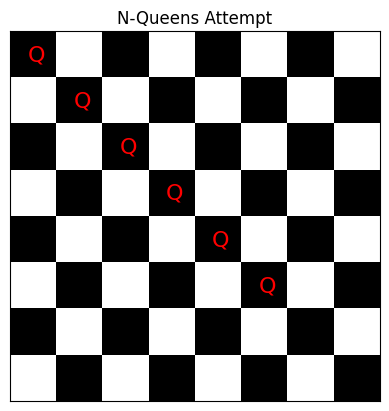

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

attempt= [0,1,2,3,4,5]

dx, dy = 0.016, 0.06
P = np.arange(-5.0, 5.0, dx)
#print(P, "\n"*3)
Q = np.arange(-5.0, 5.0, dy)
#print(Q, "\n"*3)
P, Q = np.meshgrid(P, Q)
#print(P, "\n"*3, Q)

min_max = np.min(P), np.max(P), np.min(Q), np.max(Q)
res = np.add.outer(range(8), range(8)) % 2
_=plt.imshow(res, cmap="binary_r")
plt.xticks([])
plt.yticks([])
plt.title("N-Queens Attempt")

kwargs= {'color':'red','fontsize':16}
for row in range(len(attempt)):
    plt.text(row-0.125,attempt[row]+0.125,s='Q',**kwargs)
_=plt.show()


In [ ]:
## Common Initialisation
import copy, random

workingCandidate = CandidateSolution()
openList = []
closedList = []
atGoal = False
board = [
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",],
    ["","","","","","","","",]
]
while atGoal ==False:
    x=random.randint(0,7)
    y=random.randint(0,7)
    board [x][y]= "Q"
    openList=[]

